# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [1]:
import pandas as pd

data = pd.read_csv('sr_aufg_2_29.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'])
data.head(5)

,Jahr,Einwohner
0,1790,3.929214
1,1800,5.308483
2,1810,7.239881
3,1820,9.638453
4,1830,12.866020


## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

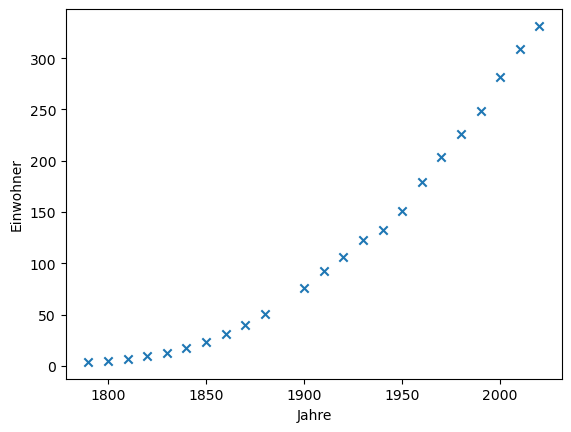

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data['Jahr'],data['Einwohner'], marker='x')
plt.xlabel("Jahre")
plt.ylabel("Einwohner")
plt.show()

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [16]:
import numpy as np 
from sklearn.linear_model import LinearRegression #importier Lineare Regression
from sklearn.preprocessing import StandardScaler #um große Zahlen zu standardisieren
from sklearn.preprocessing import PolynomialFeatures #importieren für Polynome



#Lineare Funktion
einwohner_model = LinearRegression() #Anlegen von Hülle für Lineare Regression, sodass auch andere Zellen darauf zugreifen können
x = data['Jahr'].to_numpy().reshape(-1,1) #umformatieren der Spalten notwendig, da nur ein Merkmal mit mehreren Beobachtungen, eindimensionales Array erzeugt
einwohner_model.fit(x, data['Einwohner']) #Modell wird angepasst, fit passt Parameter an 
r2_linear = einwohner_model.score(x, data['Einwohner']) #gibt das Bestimmtheitsmaß an, also wie gut Vorhersagen des Modells zu tatsächlichen Daten passt


#Polynom 2. Grades
x_scaled = StandardScaler().fit_transform(x) #notwendig beim arbeiten mit großen Zahlen
quad_jahr = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled) #erstellen der Polynome
quad_einwohner_model = LinearRegression() #Objekt für Regression erstellen  
quad_einwohner_model.fit(quad_jahr, data['Einwohner']) #Modell wird angepasst, fit passt Parameter an 
quad_einwohner_predict = quad_einwohner_model.predict(quad_jahr)
r2_poly= quad_einwohner_model.score(quad_jahr, data['Einwohner']) #Bestimmtheitsmaß


#Polynom 3. Grades
three_jahr = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_scaled)
three_einwohner_model = LinearRegression()
three_einwohner_model.fit(three_jahr, data['Einwohner'])
r_poly_3= three_einwohner_model.score(three_jahr, data['Einwohner'])


#Polynom 6. Grades
six_jahr = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_scaled)
six_einwohner_model = LinearRegression()
six_einwohner_model.fit(six_jahr, data['Einwohner'])
r_sqr_q= six_einwohner_model.score(six_jahr, data['Einwohner'])


#Logarithmusfunktion
from scipy.optimize import curve_fit #importieren notwendig für Anpassung von nicht linearen Modelle an Daten
def f_log(z, a0,a1): #definieren der Logarithmusfunktion
    return a0*z+a1
x_log = np.log(data['Jahr']) #Logarithmus anwenden auf die Werte der Spalte Jahr
coefs_log, _ = curve_fit(f_log, x_log, data['Einwohner']) #anpassen der Parameter und zurückgeben der Koeffizienten
intercept_log = coefs_log[1] #Achsenabschnitt 
y_mean = np.mean(data['Einwohner']) #Mittelwert berechnen
log_predict = f_log(x_log, *coefs_log)
sumsquared_e = np.sum((log_predict-y_mean)**2) #Summe der quadratischen Abweichungen zwischen Vorhergesagten Werten und dem Mittelwert
sumsquared_t = np.sum((data['Einwohner']-y_mean)**2) #Summe der quadratischen Abweichungnen zwischen tatsächlichen Werten und dem Mittelwert
r_squared_log = sumsquared_e/sumsquared_t #Bestimmtheitsmaß


#Tabelle
results = pd.DataFrame({
    'Regressionstyp': ['Lineare Funktion', 'Polynom 2. Grades', 'Polynom 3. Grades', 'Polynom 6. Grades', 'Logarithmusfunktion'],
    'Koeffizient': [einwohner_model.coef_[0].round(4), quad_einwohner_model.coef_.round(4), three_einwohner_model.coef_.round(2), six_einwohner_model.coef_.round(2), coefs_log.round(2)],
    'Achsenabschnitt': [einwohner_model.intercept_.round(4), quad_einwohner_model.intercept_.round(4), three_einwohner_model.intercept_.round(4), six_einwohner_model.intercept_.round(4), intercept_log.round(4)],
    'Bestimmtheitsmaß': [r2_linear.round(4), r2_poly.round(4), r_poly_3.round(4), r_sqr_q.round(4), r_squared_log.round(4)]
})

# Tabelle anzeigen
results





,Regressionstyp,Koeffizient,Achsenabschnitt,Bestimmtheitsmaß
0,Lineare Funktion,1.4203,-2590.8692,0.9242
1,Polynom 2. Grades,"[101.2412, 33.5026]",82.2085,0.9992
2,Polynom 3. Grades,"[99.27, 33.51, 1.14]",82.2312,0.9993
3,Polynom 6. Grades,"[96.03, 20.65, 6.46, 13.79, -1.7, -3.62]",84.0672,0.9996
4,Logarithmusfunktion,"[2690.22, -20200.54]",-20200.5366,0.9157


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

#### Die beste Regressionskurve ist meiner Meinung nach, die des Polynom 2. Grades: 
- Polynom 2. Grades, 3. Grades und 6. Grades besitzen alle ein ähnlich hohes Bestimmtheitsmaß.
- Jedoch ist die des 2. Grades, weniger komplex als die anderen beiden, da weniger Koeffizienten
- Außerdem liefert die des 2. Grades die besten und realistischsten Prognosen, welche auch mit dem Ergebnis der Prognose für das Jahr 2030 übereinstimmen

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

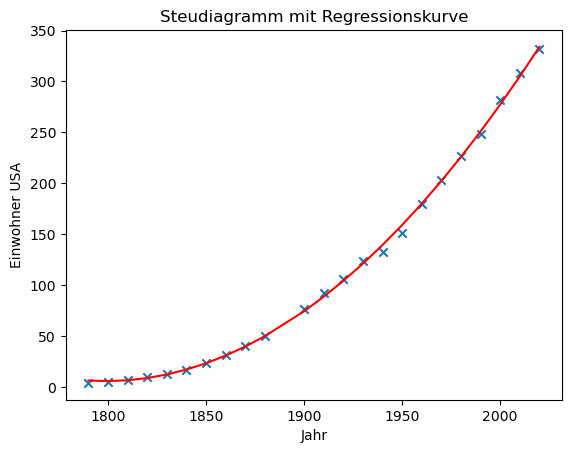

In [17]:
#Regressionskurve des Polynom 2. Grades

plt.xlabel('Jahr')
plt.ylabel('Einwohner USA')
plt.title('Steudiagramm mit Regressionskurve')

plt.scatter(data['Jahr'], data['Einwohner'], marker='x')
plt.plot(x,quad_einwohner_predict,color='red')
plt.show()



## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [18]:
# Polynom des 2. Grades
# Funktion zur Berechnung der Vorhersage mit einem Polynom des 2. Grades
def calculate_predict_2(x, a0, a1, a2): 
    return a0 + a1 * x + a2 * x**2
# Daten für das Jahr 2030 standardisieren und in die Modellfunktion einsetzen
x_2030_scaled = (2030 - np.mean(data['Jahr'])) / np.std(data['Jahr'])
#Vorhersage für das Jahr 2030 berechnen mit dem quadratischen Modell
predict_2 = calculate_predict_2(x_2030_scaled, quad_einwohner_model.intercept_, *quad_einwohner_model.coef_)
print(f"Vorhersage 2030, Polynom 2. Grades: {predict_2.round(4)} Millionen.")



# Logarithmische Funktion
def f_log(z, a0, a1):
    return a0 * z + a1

#Logarithmische Vorhersage für das Jahr 2030
x_log_2030 = np.log(2030)
log_predict = f_log(x_log_2030, *coefs_log)
print(f"Vorhersage 2030, logarithmisch: {log_predict.round(4)} Millionen.")




Vorhersage 2030, Polynom 2. Grades: 364.2455 Millionen.
Vorhersage 2030, logarithmisch: 287.6156 Millionen.


#### Die geschätzte Einwohnerzahl im Jahr 2030 beträgt 364.245.471 Menschen.

#### Verwenden des Polynom 2. Grades für die Prognose für das Jahr 2030:
- Dieses Modell liefert als einziges plausible Werte und hat für die vorhandenen Werte auch ein hohes Bestimmtheitsmaß
- Das Modell eignet sich gut, da es die beste Balance aus Komplexität und Genauigkeit bietet, was es auch am wenigsten fehleranfällig macht